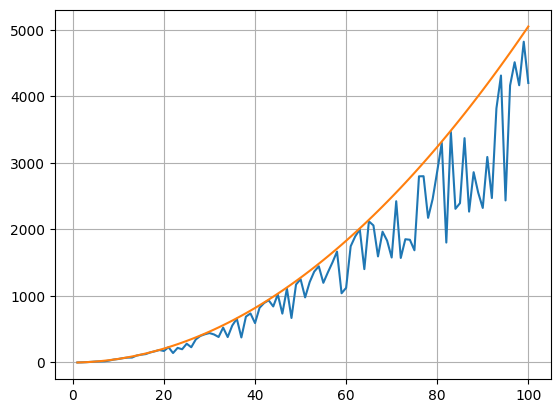

In [20]:
import random
import matplotlib.pyplot as plt

MAX = 100

# Quick Sort con conteo de ciclos
def quick_sort(arr, low, high, times):
    if low < high:
        pivot_index, times = partition(arr, low, high, times)
        times = quick_sort(arr, low, pivot_index - 1, times)
        times = quick_sort(arr, pivot_index + 1, high, times)
    return times

def partition(arr, low, high, times):
    pivot = arr[low]
    i = low + 1
    j = high

    while True:
        while i <= j and arr[i] <= pivot:
            i += 1
            times += 1
        while i <= j and arr[j] > pivot:
            j -= 1
            times += 1
        if i <= j:
            arr[i], arr[j] = arr[j], arr[i]
            times += 1
        else:
            break

    arr[low], arr[j] = arr[j], arr[low]
    times += 1
    return j, times

x = []
y = []
y_peor = []
arr = []
arr_peor = []

for i in range(MAX):
    arr.append(random.randint(-1000, 1000))
    arr_peor.append(i)
    x.append(len(arr))
    times = 0
    times = quick_sort(arr, 0, len(arr) - 1, times)
    y.append(times)
    times = 0
    times = quick_sort(arr_peor, 0, len(arr_peor) - 1, times)
    y_peor.append(times)

plt.plot(x, y)
plt.plot(x, y_peor)
plt.grid(True)
plt.show()

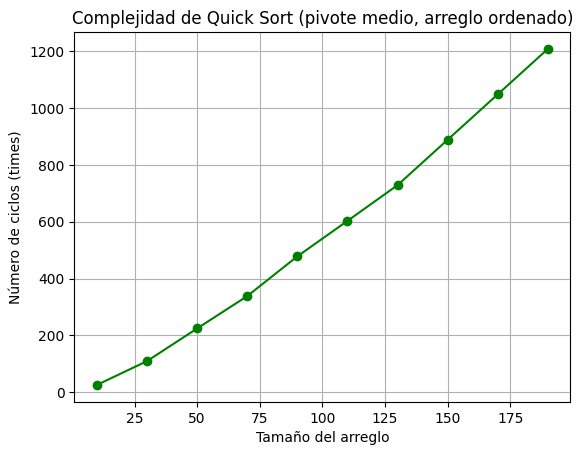

In [19]:
import random
import matplotlib.pyplot as plt

# Quick Sort con pivote central y conteo de ciclos
def quick_sort_mid(arr, low, high, times):
    if low < high:
        pivot_index, times = partition_mid(arr, low, high, times)
        times = quick_sort_mid(arr, low, pivot_index - 1, times)
        times = quick_sort_mid(arr, pivot_index + 1, high, times)
    return times

def partition_mid(arr, low, high, times):
    mid = (low + high) // 2
    pivot = arr[mid]
    i = low
    j = high

    while True:
        while i <= j and arr[i] < pivot:
            i += 1
            times += 1  # contar comparación
        while i <= j and arr[j] > pivot:
            j -= 1
            times += 1  # contar comparación
        if i <= j:
            arr[i], arr[j] = arr[j], arr[i]
            times += 1  # contar intercambio
            i += 1
            j -= 1
        else:
            break

    return i - 1, times

# Función para graficar la complejidad de Quick Sort con pivote central en un arreglo ordenado
def plot_quick_sort_mid_complexity(max_size=200, step=20):
    sizes = list(range(10, max_size+1, step))
    times_list = []

    for n in sizes:
        arr = list(range(n))  # arreglo ya ordenado
        times = 0
        times = quick_sort_mid(arr, 0, n-1, times)
        times_list.append(times)

    plt.plot(sizes, times_list, marker='o', color='green')
    plt.title("Complejidad de Quick Sort (pivote medio, arreglo ordenado)")
    plt.xlabel("Tamaño del arreglo")
    plt.ylabel("Número de ciclos (times)")
    plt.grid(True)
    plt.show()

# Ejecutar la gráfica
plot_quick_sort_mid_complexity()


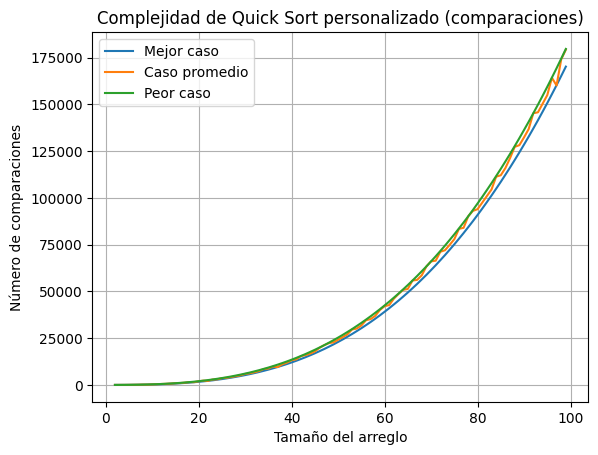

In [26]:
import matplotlib.pyplot as plt
import random

# Función Quick Sort con contador como parámetro
def quick_sort_custom(arr, times=0):
    if len(arr) <= 1:
        return arr, times

    pivot_index = len(arr) // 2
    pivot = arr[pivot_index]

    menores = []
    mayores = []

    i = len(arr) - 1
    while i >= 0:
        if i == pivot_index:
            i -= 1
            continue
        times += 1
        if pivot > arr[i]:
            arr[i], pivot = pivot, arr[i]
            j = 0
            while j < len(arr):
                if j == pivot_index:
                    j += 1
                    continue
                times += 1
                if pivot < arr[j]:
                    arr[j], pivot = pivot, arr[j]
                j += 1
        i -= 1

    idx = 0
    while idx < len(arr):
        if idx != pivot_index:
            times += 1
            if arr[idx] < pivot:
                menores.append(arr[idx])
            elif arr[idx] > pivot:
                mayores.append(arr[idx])
        idx += 1

    mayores_ordenados, times = quick_sort_custom(mayores, times)
    menores_ordenados, times = quick_sort_custom(menores, times)

    return menores_ordenados + [pivot] + mayores_ordenados, times

# Tamaños de prueba
tamanos = list(range(2, 100))  # arreglos de tamaño 2 a 20
mejor_caso = []
peor_caso = []
promedio_caso = []

for n in tamanos:
    # Mejor caso: arreglo ya ordenado
    arr_mejor = list(range(1, n+1))
    _, comp = quick_sort_custom(arr_mejor)
    mejor_caso.append(comp)

    # Peor caso: arreglo inverso
    arr_peor = list(range(n, 0, -1))
    _, comp = quick_sort_custom(arr_peor)
    peor_caso.append(comp)

    # Caso promedio: arreglo aleatorio
    arr_prom = list(range(1, n+1))
    random.shuffle(arr_prom)
    _, comp = quick_sort_custom(arr_prom)
    promedio_caso.append(comp)

# Graficar
plt.plot(tamanos, mejor_caso, label='Mejor caso')
plt.plot(tamanos, promedio_caso, label='Caso promedio')
plt.plot(tamanos, peor_caso, label='Peor caso')
plt.title('Complejidad de Quick Sort personalizado (comparaciones)')
plt.xlabel('Tamaño del arreglo')
plt.ylabel('Número de comparaciones')
plt.legend()
plt.grid(True)
plt.show()


In [163]:
import random
import matplotlib.pyplot as plt

MAX = 500

def quick_sort_exe(arr):
    quick_sort(arr, 0, len(arr) - 1)

def quick_sort(arr, low, high):
    if low < high:
        pivot_index = partition(arr, low, high)
        quick_sort(arr, low, pivot_index)
        quick_sort(arr, pivot_index + 1, high)


def partition(arr, low, high):
    pivot = arr[(low + high) // 2]
    i = low - 1
    j = high + 1

    while True:
        i += 1
        while arr[i] < pivot:
            i += 1
        j -= 1
        while arr[j] > pivot:
            j -= 1

        if i >= j:
            return j

        temp = arr[i]
        arr[i] = arr[j]
        arr[j] = temp

arr = []
for i in range(MAX):
    arr.append(random.randint(-1000, 1000))

print("Arreglo original:", arr)
quick_sort_exe(arr)
print("Arreglo ordenado:", arr)


Arreglo original: [291, 807, 19, -728, 127, -736, 764, -890, 257, 731, 685, -321, 630, -656, -454, 564, -389, 526, -171, -640, -177, -517, -991, 481, -5, 238, 793, 46, 959, 375, 703, -350, -97, -926, 449, 952, 771, -207, -893, -53, -303, -634, -232, 5, -511, 927, 49, 470, 867, -96, 286, 391, -719, 69, -346, -341, 244, -919, 211, -958, 903, -827, 862, -36, -640, 920, 908, 741, 96, 327, 24, 751, -970, 176, 768, -153, 639, -711, 1000, -20, -712, -185, -730, 894, 629, -881, -801, -597, 477, 494, -594, 356, 758, -514, 777, -22, 310, -115, -739, 115, -649, -564, 300, -274, 141, 150, -417, -324, 724, 271, 528, 277, -250, -213, -531, 37, 805, -660, -290, -721, -991, -50, -529, -740, 914, -94, 554, 876, 793, 668, 476, 888, -611, -670, 408, 174, 919, -529, -103, 413, -561, 305, -677, -665, 382, -919, 945, 216, -344, -973, -527, 244, -665, 950, -376, -607, 870, 443, 422, -981, 165, 229, -202, 906, -597, 177, -234, 465, 655, 914, 885, -146, -257, 256, 696, -738, -465, -352, 390, 871, 740, -222, -1

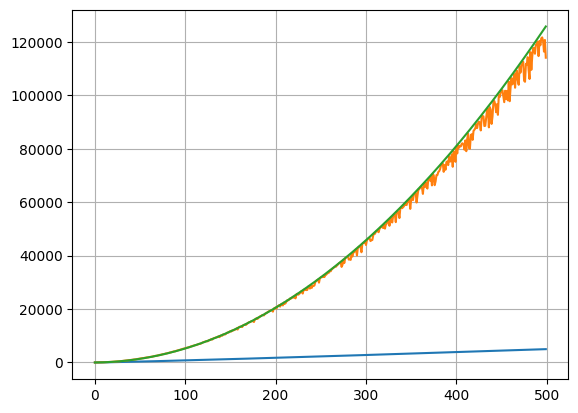

In [173]:
def quick_sort_exe_g(arr, p):
    return quick_sort_g(arr, 0, len(arr) - 1, 0, p)

def quick_sort_g(arr, low, high, times, p):
    if low < high:
        pivot_index, times = partition_g(arr, low, high, times, p)
        times = quick_sort_g(arr, low, pivot_index, times, p)
        times = quick_sort_g(arr, pivot_index + 1, high, times, p)
    return times

def partition_g(arr, low, high, times, p):
    if p == 1:
        pivot = arr[(low + high) // 2]
    else:
        pivot = arr[low]
    i = low - 1
    j = high + 1

    while True:
        i += 1
        while arr[i] < pivot:
            times += 1 
            i += 1
        times += 1
        j -= 1
        while arr[j] > pivot:
            times += 1
            j -= 1
        times += 1
        if i >= j:
            return j, times
        temp = arr[i]
        arr[i] = arr[j]
        arr[j] = temp
        times += 1
        
x = []
y_mejor = []
y_prom = []
y_peor = []
arr_mejor = []
arr_prom = []
arr_peor = []

for i in range(MAX):
    arr_mejor.append(i)
    arr_prom.append(random.randint(-1000, 1000))
    arr_peor.append(i)
    y_mejor.append(quick_sort_exe_g(arr_mejor, 1))
    y_prom.append(quick_sort_exe_g(arr_prom, 0))
    y_peor.append(quick_sort_exe_g(arr_peor, 0))
    x.append(i)

plt.plot(x, y_mejor)
plt.plot(x, y_prom)
plt.plot(x, y_peor)
plt.grid(True)
plt.show()
